In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('/content/spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [63]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

df = pd.read_csv('spotify.csv')

print("Initial Dataframe Info:")
print(df.info())
print("\nInitial Dataframe Shape:", df.shape)

print("\nChecking for Null Values:")
null_counts = df.isnull().sum()
print(null_counts)

if null_counts.any():
    print("\nNull values detected. Handling null values...")
    df = df.dropna()
    print("Null values handled. New Dataframe Shape:", df.shape)
else:
    print("\nNo null values detected.")

print("\nChecking for Duplicate Rows:")
duplicates = df.duplicated(keep=False)
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate Rows:")
    print(df[duplicates])


    print("\nHandling duplicate rows...")
    df = df.drop_duplicates(keep='first')
    print("Duplicates handled. New Dataframe Shape:", df.shape)
else:
    print("\nNo fully identical duplicate rows detected.")

print("\nChecking for potential duplicates based on 'Artist' and 'Track Name':")
potential_duplicates = df.duplicated(subset=['Artist', 'Track Name'], keep=False)
potential_duplicate_count = potential_duplicates.sum()
print(f"Number of potential duplicate rows (same Artist and Track Name): {potential_duplicate_count}")

if potential_duplicate_count > 0:
    print("\nPotential Duplicate Rows (same Artist and Track Name):")
    print(df[potential_duplicates][['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID']])

    print("\nHandling potential duplicates (keeping row with highest Popularity)...")
    df = df.sort_values(by='Popularity', ascending=False).drop_duplicates(subset=['Artist', 'Track Name'], keep='first')
    print("Potential duplicates handled. New Dataframe Shape:", df.shape)
else:
    print("\nNo potential duplicates based on Artist and Track Name detected.")

df.to_csv('spotify_cleaned.csv', index=False)
print("\nCleaned dataframe saved as 'spotify_cleaned.csv'.")

print("\nFinal Dataframe Info:")
print(df.info())
print("\nFinal Dataframe Shape:", df.shape)

Initial Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
None

Initial Dataframe Shape: (440, 5)

Checking for Null Values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

No null values detected.

Checking for Duplicate Rows:
Number of duplicate rows: 53

Duplicate Rows:
              Artist                                         Track Name  \
3              Drake               First Person Shooter (feat. J. Cole)   
4              Drake                      Jimmy Cooks (feat. 21 Savage)   
7       Travis Sco

Popularity Distribution Statistics:
count    412.000000
mean      75.402913
std        9.794124
min       29.000000
25%       70.000000
50%       76.000000
75%       82.000000
max       97.000000
Name: Popularity, dtype: float64


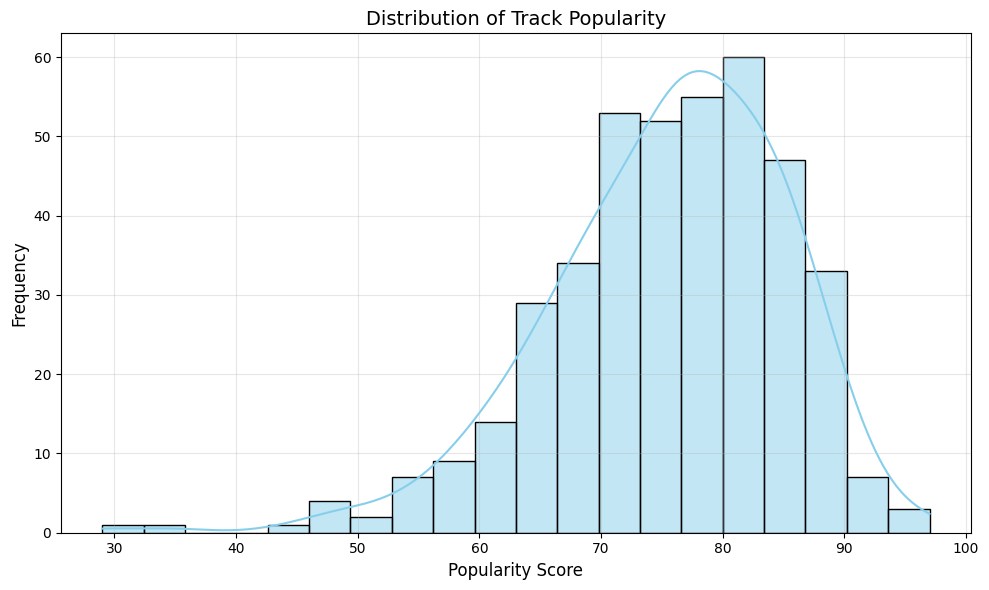

In [64]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
print("Popularity Distribution Statistics:")
print(df['Popularity'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Popularity', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity', fontsize=14)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

 Correlation Coefficient between Popularity and Duration (ms): 0.039


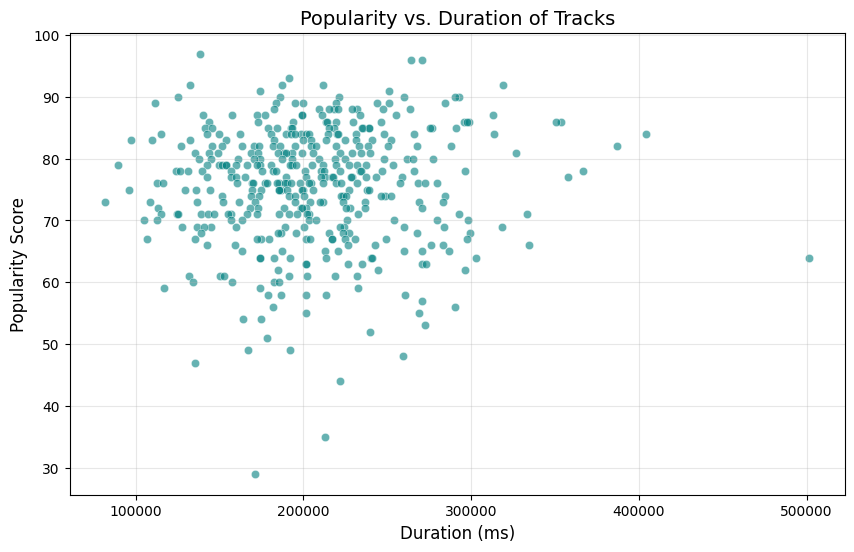

In [66]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
correlation = df['Popularity'].corr(df['Duration (ms)'])
print(f" Correlation Coefficient between Popularity and Duration (ms): {correlation:.3f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6, color='teal')
plt.title('Popularity vs. Duration of Tracks', fontsize=14)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Track Counts per Artist:
Artist
Drake              17
Eminem             11
¥$                 10
21 Savage          10
Timbaland          10
                   ..
That Mexican OT     1
Fivio Foreign       1
RAYE                1
Arizona Zervas      1
Pressa              1
Name: count, Length: 115, dtype: int64

Artist with the Highest Number of Tracks: Drake (17 tracks)


<ipython-input-67-e6d2b3dbd80f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Artist', order=artist_counts.index, palette='viridis')


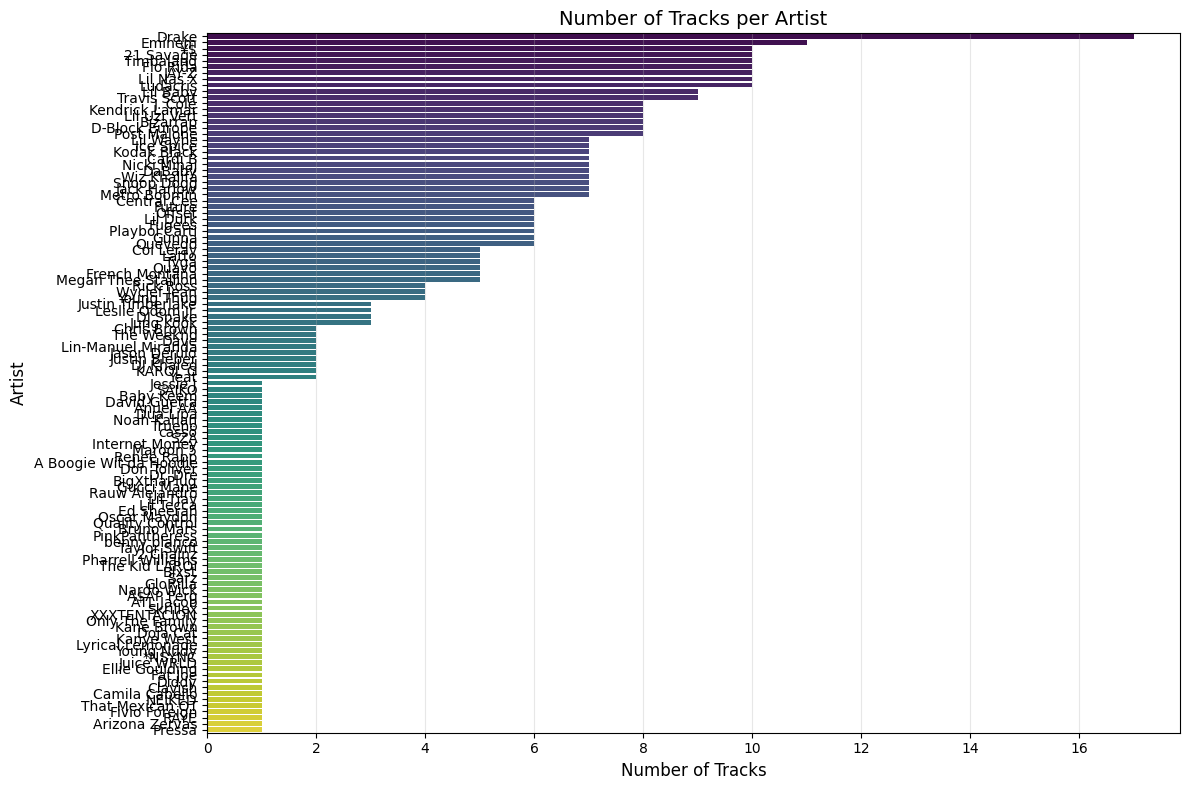

In [67]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
artist_counts = df['Artist'].value_counts()
print("Track Counts per Artist:")
print(artist_counts)

top_artist = artist_counts.idxmax()
top_count = artist_counts.max()
print(f"\nArtist with the Highest Number of Tracks: {top_artist} ({top_count} tracks)")

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Artist', order=artist_counts.index, palette='viridis')
plt.title('Number of Tracks per Artist', fontsize=14)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [68]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)

print("Top 5 Least Popular Tracks:")
for index, row in least_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track Name: {row['Track Name']}, Popularity: {row['Popularity']}")

Top 5 Least Popular Tracks:
Artist: Pressa, Track Name: Attachments (feat. Coi Leray), Popularity: 29
Artist: Justin Bieber, Track Name: Intentions, Popularity: 35
Artist: French Montana, Track Name: Splash Brothers, Popularity: 44
Artist: Lil Baby, Track Name: On Me - Remix, Popularity: 47
Artist: Wyclef Jean, Track Name: 911 (feat. Mary J. Blige), Popularity: 48


In [69]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?
artist_counts = df['Artist'].value_counts()
top_5_artists = artist_counts.head(5).index
print("Top 5 Artists by Track Count:")
for artist, count in artist_counts.head(5).items():
    print(f"{artist}: {count} tracks")

average_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print("\nAverage Popularity for Top 5 Artists:")
print(average_popularity)

top_avg_artist = average_popularity.idxmax()
top_avg_value = average_popularity.max()
print(f"\nArtist with Highest Average Popularity: {top_avg_artist} ({top_avg_value:.2f})")

Top 5 Artists by Track Count:
Drake: 17 tracks
Eminem: 11 tracks
¥$: 10 tracks
21 Savage: 10 tracks
Timbaland: 10 tracks

Average Popularity for Top 5 Artists:
Artist
¥$           85.100000
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
Timbaland    69.000000
Name: Popularity, dtype: float64

Artist with Highest Average Popularity: ¥$ (85.10)


In [70]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?
artist_counts = df['Artist'].value_counts()
top_5_artists = artist_counts.head(5).index
print("Top 5 Artists by Track Count:")
for artist, count in artist_counts.head(5).items():
    print(f"{artist}: {count} tracks")

print("\nMost Popular Tracks for Top 5 Artists:")
for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    max_popularity = artist_tracks['Popularity'].max()
    most_popular_tracks = artist_tracks[artist_tracks['Popularity'] == max_popularity][['Track Name', 'Popularity']]
    print(f"\nArtist: {artist}")
    for index, row in most_popular_tracks.iterrows():
        print(f"Track Name: {row['Track Name']}, Popularity: {row['Popularity']}")

Top 5 Artists by Track Count:
Drake: 17 tracks
Eminem: 11 tracks
¥$: 10 tracks
21 Savage: 10 tracks
Timbaland: 10 tracks

Most Popular Tracks for Top 5 Artists:

Artist: Drake
Track Name: Rich Baby Daddy (feat. Sexyy Red & SZA), Popularity: 92

Artist: Eminem
Track Name: Without Me, Popularity: 90

Artist: ¥$
Track Name: CARNIVAL, Popularity: 96

Artist: 21 Savage
Track Name: redrum, Popularity: 96

Artist: Timbaland
Track Name: The Way I Are, Popularity: 85


Numerical Columns for Pair Plot: ['Popularity', 'Duration (ms)']


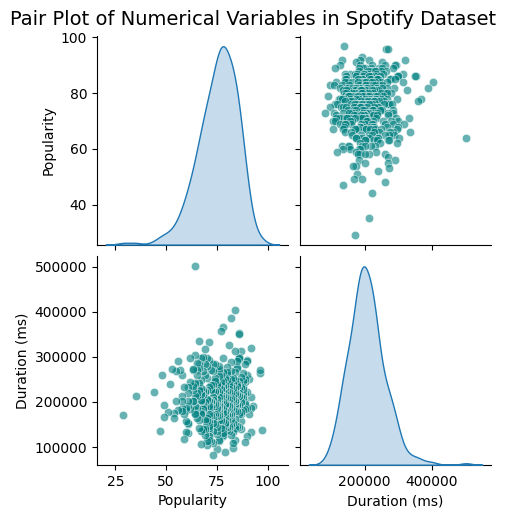

In [71]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.
numerical_cols = ['Popularity', 'Duration (ms)']
print("Numerical Columns for Pair Plot:", numerical_cols)

sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.6, 'color': 'teal'})
plt.suptitle('Pair Plot of Numerical Variables in Spotify Dataset', y=1.02, fontsize=14)
plt.show()

Top 10 Artists by Track Count:
Drake: 17 tracks
Eminem: 11 tracks
¥$: 10 tracks
21 Savage: 10 tracks
Timbaland: 10 tracks
Flo Rida: 10 tracks
JAY-Z: 10 tracks
Lil Nas X: 10 tracks
Ludacris: 10 tracks
Lil Baby: 9 tracks


<ipython-input-72-fe42a02a5d0e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_artists, x='Artist', y='Duration (ms)', palette='Set2')


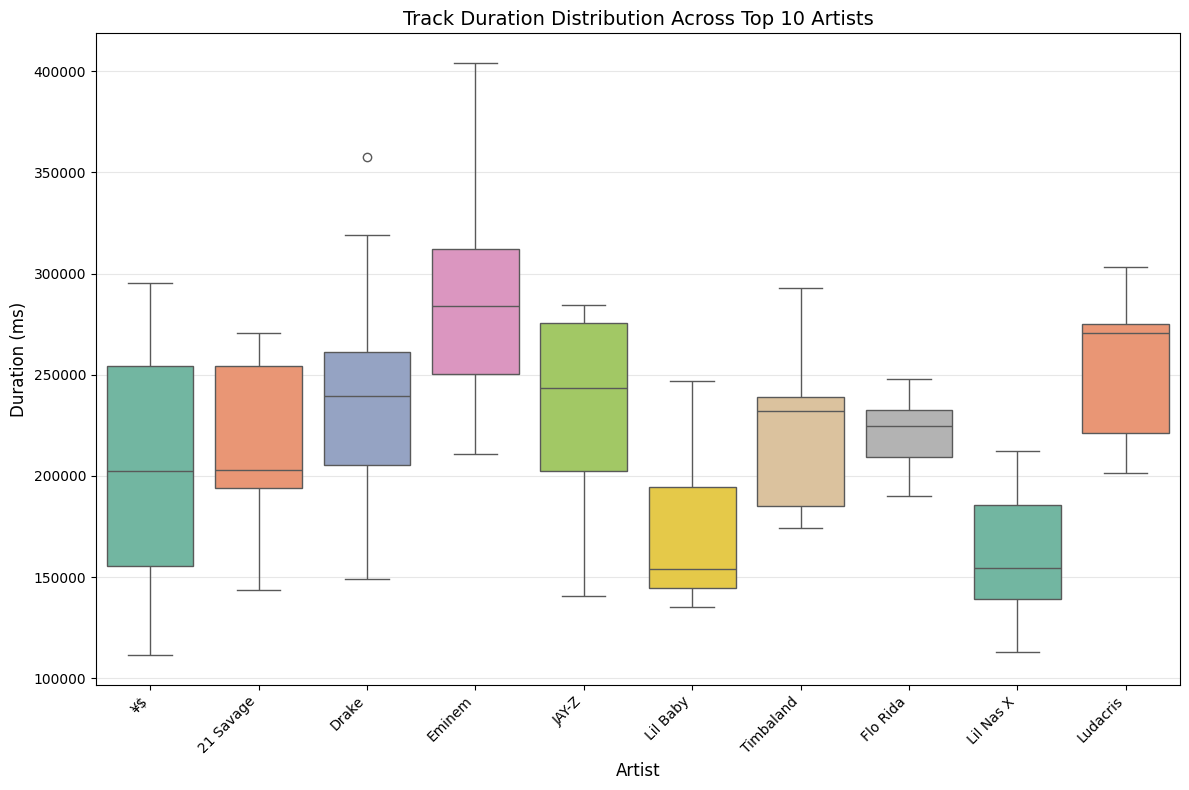


Summary Statistics for Duration (ms) per Artist:
           count           mean           std       min        25%       50%  \
Artist                                                                         
21 Savage   10.0  215707.100000  41243.843022  143718.0  193954.75  202938.5   
Drake       17.0  241581.529412  53991.410875  149077.0  205426.00  239359.0   
Eminem      11.0  285642.181818  58133.599333  210800.0  250474.00  284200.0   
Flo Rida    10.0  220676.500000  18999.773626  190185.0  209430.00  224455.5   
JAY-Z       10.0  232998.300000  50856.398575  140746.0  202523.00  243426.5   
Lil Baby     9.0  170170.222222  37665.627778  135444.0  144651.00  154023.0   
Lil Nas X   10.0  159372.400000  35940.037406  113000.0  139253.25  154381.5   
Ludacris    10.0  255682.200000  36004.823667  201586.0  221473.00  270806.0   
Timbaland   10.0  220084.600000  37932.559334  174222.0  184983.25  232213.0   
¥$          10.0  202406.600000  65018.834133  111458.0  155616.25  20

In [72]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?
artist_counts = df['Artist'].value_counts()
top_10_artists = artist_counts.head(10).index
print("Top 10 Artists by Track Count:")
for artist, count in artist_counts.head(10).items():
    print(f"{artist}: {count} tracks")

df_top_artists = df[df['Artist'].isin(top_10_artists)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_artists, x='Artist', y='Duration (ms)', palette='Set2')
plt.title('Track Duration Distribution Across Top 10 Artists', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSummary Statistics for Duration (ms) per Artist:")
duration_stats = df_top_artists.groupby('Artist')['Duration (ms)'].describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(duration_stats)

Top 10 Artists by Track Count:
Drake: 17 tracks
Eminem: 11 tracks
¥$: 10 tracks
21 Savage: 10 tracks
Timbaland: 10 tracks
Flo Rida: 10 tracks
JAY-Z: 10 tracks
Lil Nas X: 10 tracks
Ludacris: 10 tracks
Lil Baby: 9 tracks


<ipython-input-73-53a832490bf1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_top_artists, x='Artist', y='Popularity', palette='Set2', size=6)


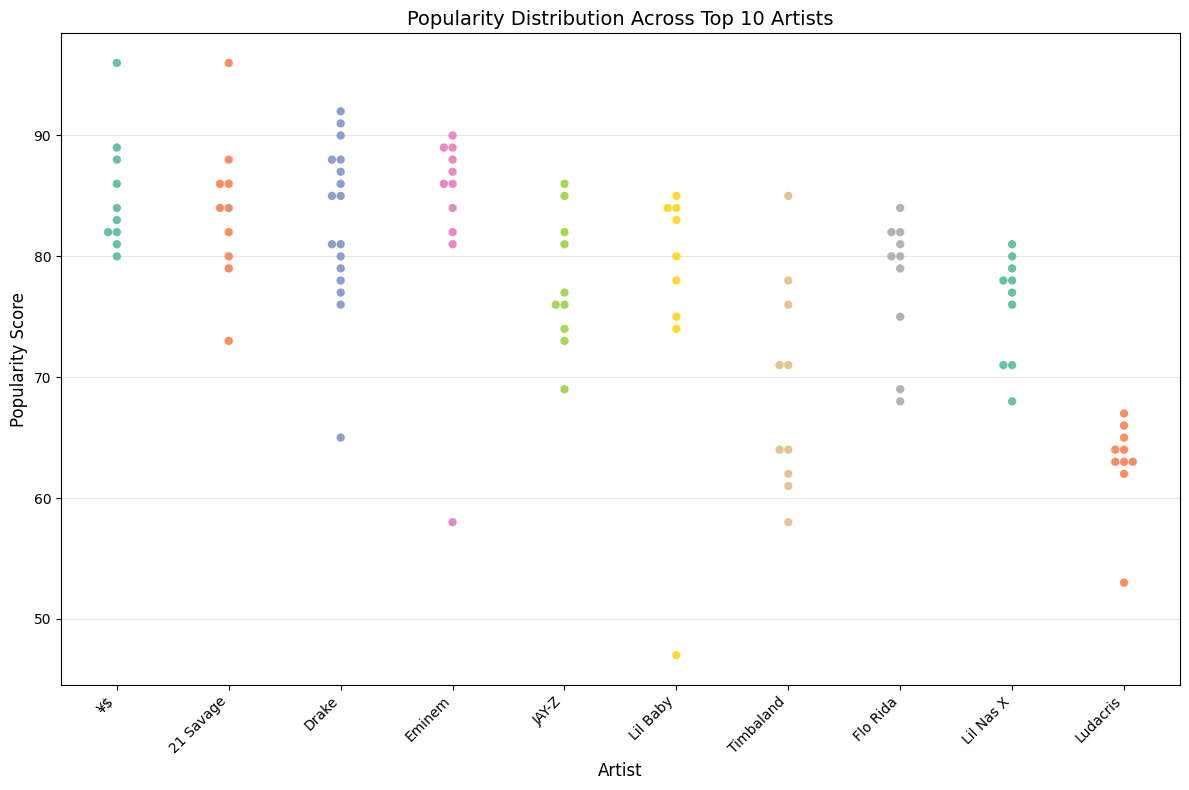


Summary Statistics for Popularity per Artist:
           count       mean        std   min    25%   50%    75%   max
Artist                                                                
21 Savage   10.0  83.800000   6.088240  73.0  80.50  84.0  86.00  96.0
Drake       17.0  82.882353   6.818012  65.0  79.00  85.0  88.00  92.0
Eminem      11.0  83.636364   8.980788  58.0  83.00  86.0  88.50  90.0
Flo Rida    10.0  78.000000   5.537749  68.0  76.00  80.0  81.75  84.0
JAY-Z       10.0  77.900000   5.466057  69.0  74.50  76.5  81.75  86.0
Lil Baby     9.0  76.666667  11.832160  47.0  75.00  80.0  84.00  85.0
Lil Nas X   10.0  75.900000   4.383048  68.0  72.25  77.5  78.75  81.0
Ludacris    10.0  63.000000   3.829708  53.0  63.00  63.5  64.75  67.0
Timbaland   10.0  69.000000   8.679478  58.0  62.50  67.5  74.75  85.0
¥$          10.0  85.100000   4.840799  80.0  82.00  83.5  87.50  96.0


In [73]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot?
artist_counts = df['Artist'].value_counts()
top_10_artists = artist_counts.head(10).index
print("Top 10 Artists by Track Count:")
for artist, count in artist_counts.head(10).items():
    print(f"{artist}: {count} tracks")

df_top_artists = df[df['Artist'].isin(top_10_artists)]

plt.figure(figsize=(12, 8))
sns.swarmplot(data=df_top_artists, x='Artist', y='Popularity', palette='Set2', size=6)
plt.title('Popularity Distribution Across Top 10 Artists', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSummary Statistics for Popularity per Artist:")
popularity_stats = df_top_artists.groupby('Artist')['Popularity'].describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(popularity_stats)